In [1]:
##Library for loading data
import m24
##Basic libraries for plotting and working with arrays
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
import numpy as np
import Funciones as fn
### skewness and kurtosis
from scipy.stats import kurtosis
from scipy.stats import skew
## seaborn for plotting 
import seaborn as sns

In [2]:
### Array for of times
times=np.arange(-2.001, 8, 0.001)
#Index for every condition
#indexes of f1
inf=np.where(times>=0)[0]
sup=np.where(times<=0.5)[0]
i_f1=np.intersect1d(inf,sup)
#index of interstimulus delay
infd=np.where(times>=0.5)[0]
supd=np.where(times<=3.5)[0]
i_delay=np.intersect1d(infd,supd)
#index of f2
inf2=np.where(times>=3.5)[0]
sup2=np.where(times<=4)[0]
i_f2=np.intersect1d(inf2,sup2)
#index of decision 
i_de=np.where(times>=4)[0]

In [3]:
# Loading the files
path_to_file_directory = "C:/Users/sound/Documents/DatosLFP_Saskia/preprocessed_task"
files = m24.getFilelist(path_to_file_directory)
nexp=len(files)# number of experiments

In [4]:
#number of experiment
e=0
# loading the data 
exp_id=m24.getSessionID(files[e])
data, electrodes, trials, info = m24.loadSaskia(files[e]) # data of a particular exp
e_keys=list(electrodes[1])# names of the electrodes in this exp
## creating a dictionary
eltcshm={name:[[],[]] for name in e_keys}#[0] hits #[1] misses
elt={name:[] for name in e_keys}#[0] hits #[1] misses
i_hits=np.where(info[:,2]==1) # index of hits in this exp
i_misses=np.where(info[:,2]==0) # index of misses this exp
######hits and misses by electrode
for ch in e_keys: # bucle for every chanel/electrode in this file
    idx = e_keys.index(ch) #index of the electrode in the list of names of the electrodes in this exp
    e_lfp = m24.getElectrode(idx,data,trials)# data of the particular electrode
    elt[ch].append(e_lfp)
    eltcshm[ch][0].append(e_lfp[i_hits]) # hits of this exp
    eltcshm[ch][1].append(e_lfp[i_misses]) # misses of this exp

C:\Users\sound\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

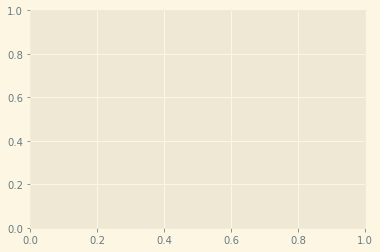

In [15]:
##Distribution of misses and hits, of every electrode of this experiment without separation of conditions
#### in plots: comparing first try of hits with first try of misses, in the same plot
for e in e_keys:
    ehits=np.vstack(eltcshm[e][0])
    emiss=np.vstack(eltcshm[e][1])
    dhits,dmiss,bins=fn.getDistributions(ehits,emiss)
    #dhits and dmiss
    sns.histplot(dhits[0],binwidth=np.diff(bins),color='C0',label=' Hits')# distribución del 1er ensayo hit de ese experimento 
    #sns.histplot(bins[1:],dmiss[0],binwidth=np.diff(bins),color='C1',label=' Misses')# distribución del 1er ensayo miss de ese experimento 
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,} # formato para el título
    plt.title(f' {e} Hit vs Miss \n Exp id {exp_id}',fontdict_title)
    plt.legend() 
    plt.xlabel('Voltaje')
    plt.ylabel('Probabilidad')
    plt.show()

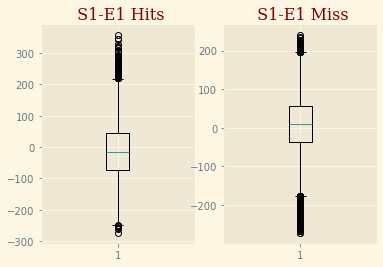

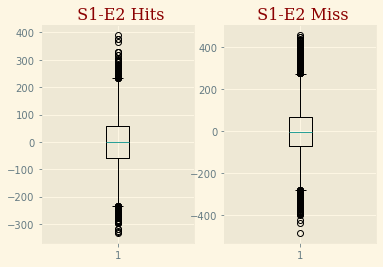

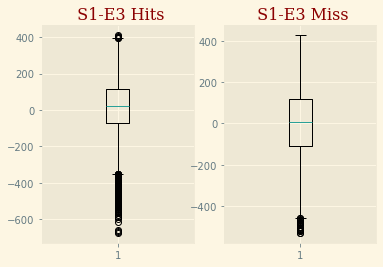

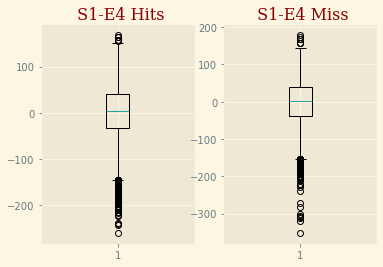

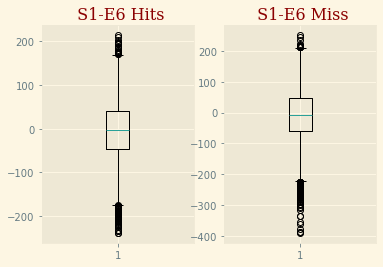

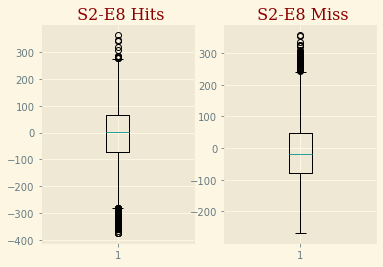

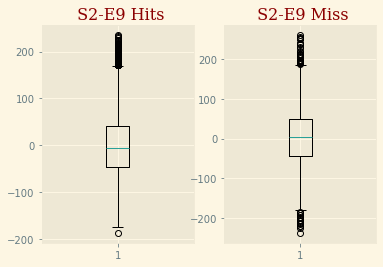

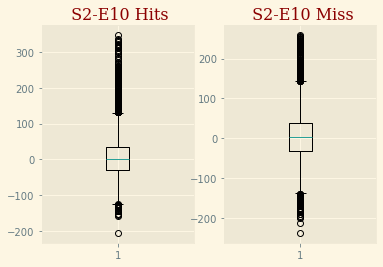

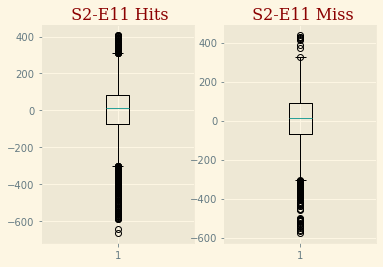

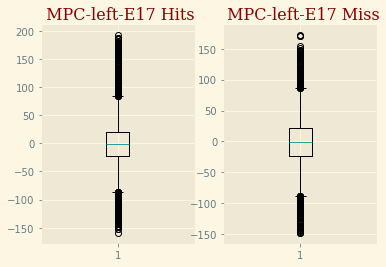

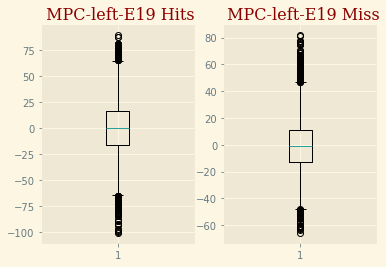

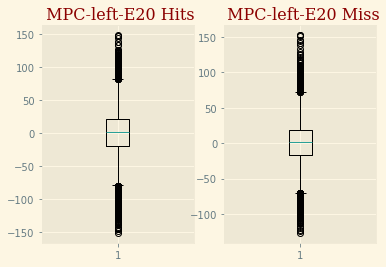

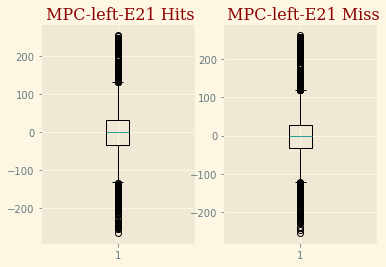

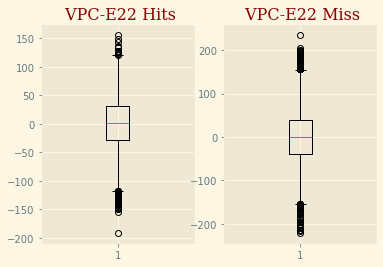

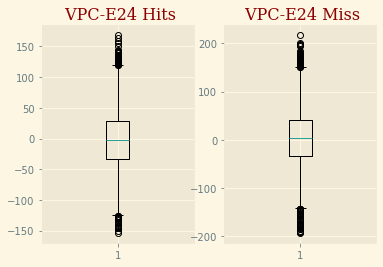

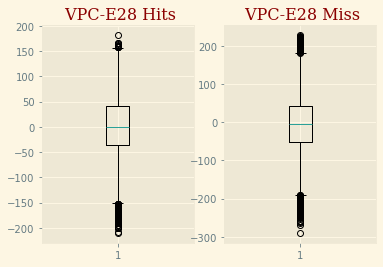

In [37]:
##Boxplots of misses and hits, of every electrode in this experiments without separtion of conditions
#### in plots: comparing first try of hits with first try of misses
for e in e_keys:
    ehits=np.vstack(eltcshm[e][0])
    emiss=np.vstack(eltcshm[e][1])
    #dhits,dmiss,bins=getDistributions(ehits,emiss)
    #dhits
    #boxplot(data, notch=None, vert=None, patch_artist=None, widths=None)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.boxplot(ehits[0]) # dhtis[0] corresponde a la distribución del ensayo 1
    ax1.set_title(f' {e} Hits',fontdict_title)
    #######################
    ax2.boxplot(emiss[0]) # dmiss[0] corresponde a la distribución del ensayo 1
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,} # formato para el título
    ax2.set_title(f' {e} Miss',fontdict_title)

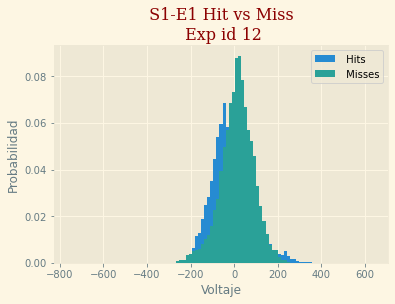

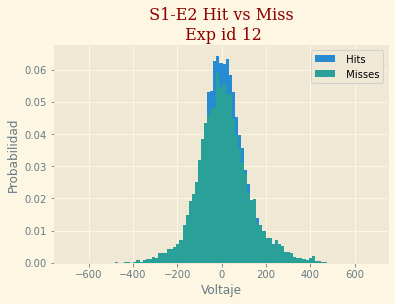

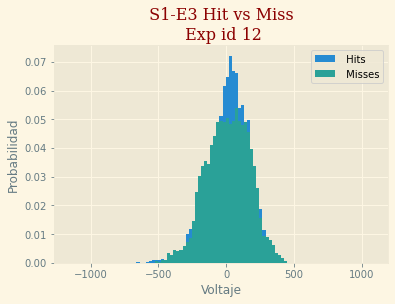

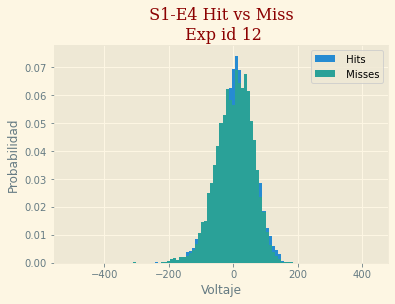

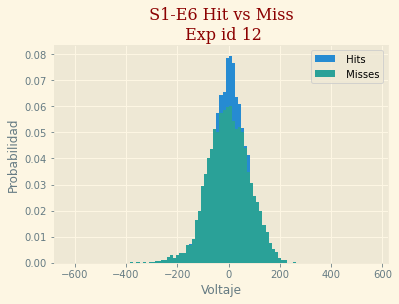

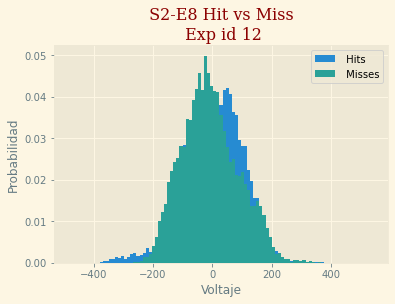

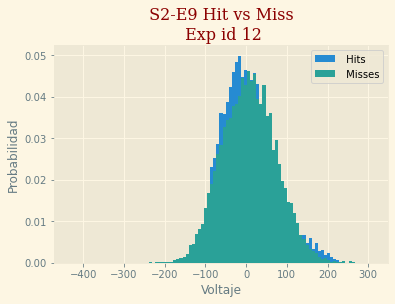

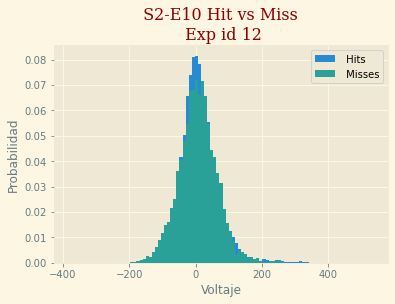

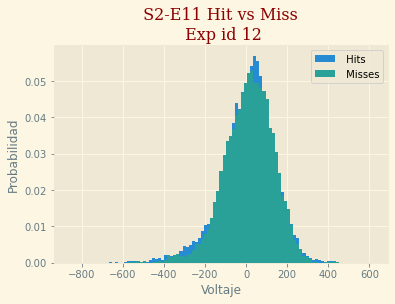

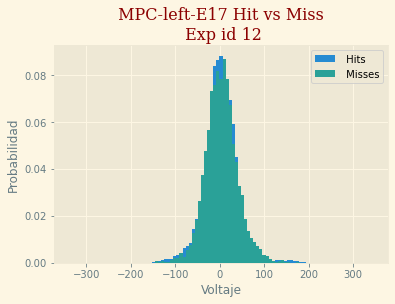

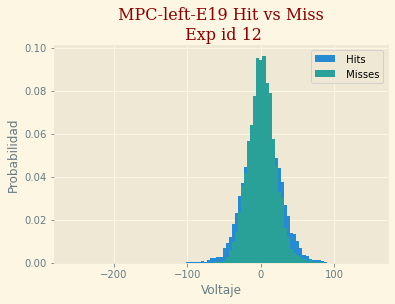

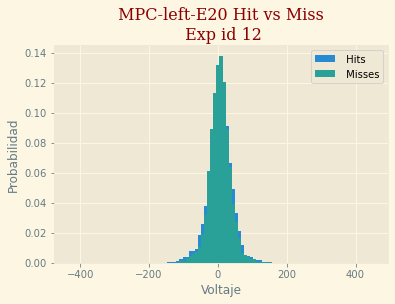

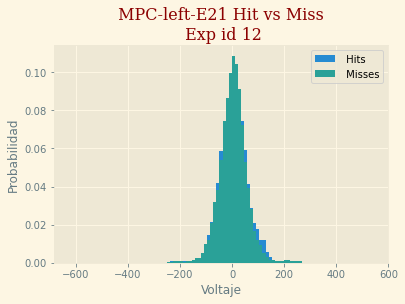

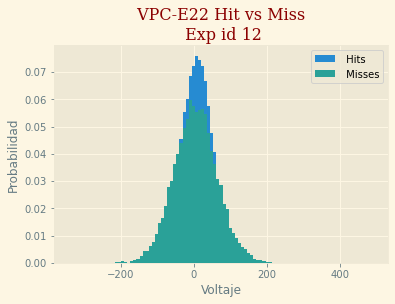

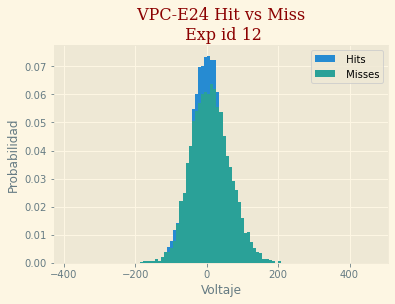

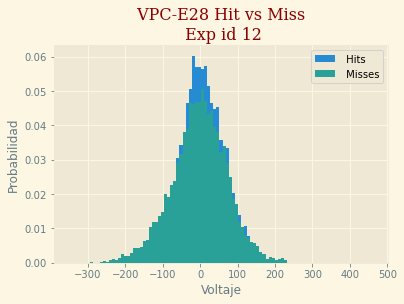

In [16]:
##Distribution of misses and hits, of every electrode of this experiment without separation of conditions
#### in plots: comparing first try of hits with first try of misses, in the same plot
for e in e_keys:
    ehits=np.vstack(eltcshm[e][0])
    emiss=np.vstack(eltcshm[e][1])
    dhits,dmiss,bins=fn.getDistributions(ehits,emiss)
    #dhits and dmiss
    plt.bar(bins[1:],dhits[0],width=np.diff(bins),color='C0',label=' Hits')# distribución del 1er ensayo hit de ese experimento 
    plt.bar(bins[1:],dmiss[0],width=np.diff(bins),color='C1',label=' Misses')# distribución del 1er ensayo miss de ese experimento 
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,} # formato para el título
    plt.title(f' {e} Hit vs Miss \n Exp id {exp_id}',fontdict_title)
    plt.legend() 
    plt.xlabel('Voltaje')
    plt.ylabel('Probabilidad')
    plt.show()

la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en S1-E1 es


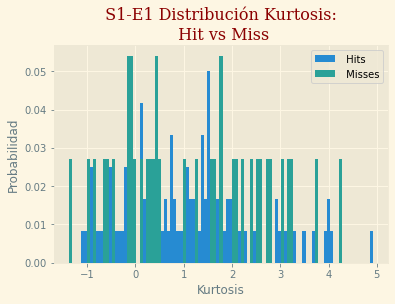

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en S1-E2 es


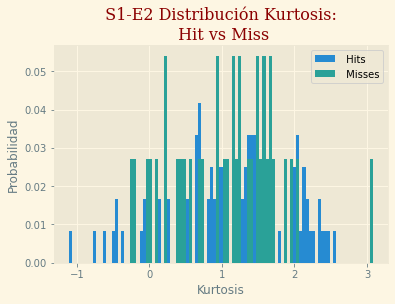

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en S1-E3 es


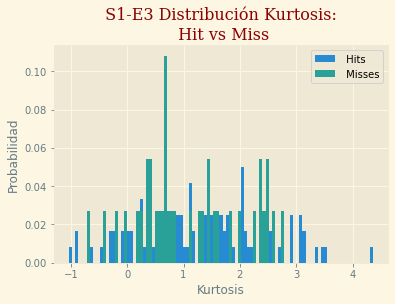

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en S1-E4 es


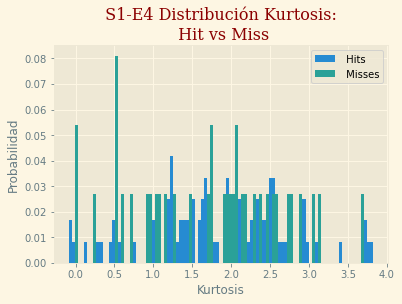

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en S1-E6 es


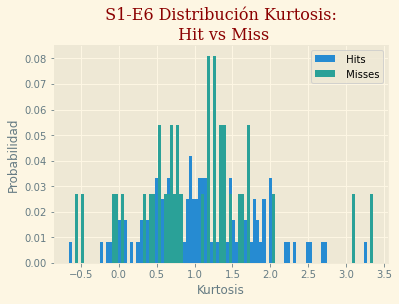

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en S2-E8 es


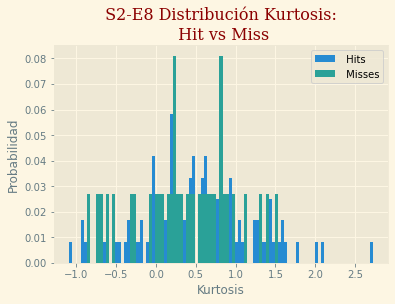

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en S2-E9 es


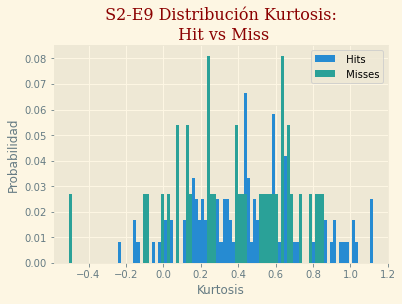

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en S2-E10 es


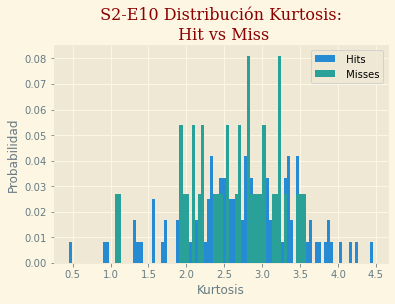

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en S2-E11 es


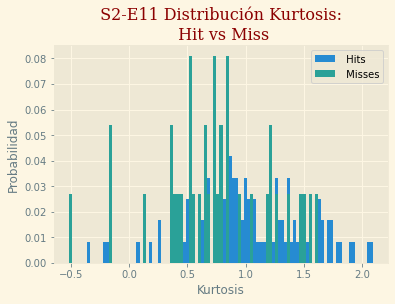

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en MPC-left-E17 es


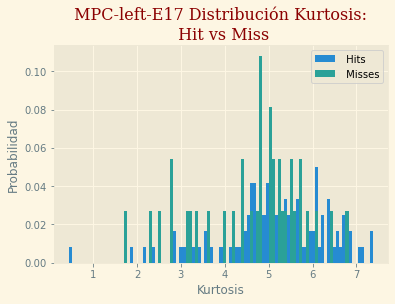

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en MPC-left-E19 es


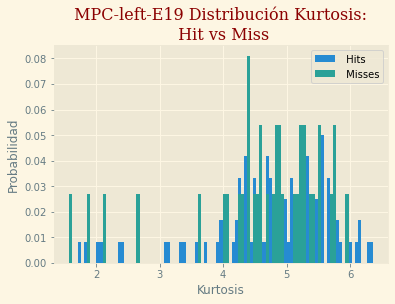

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en MPC-left-E20 es


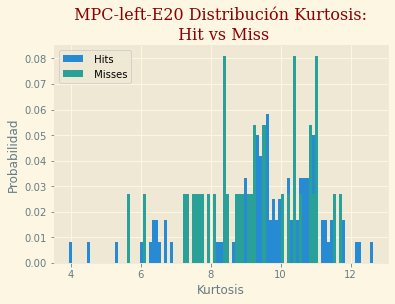

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en MPC-left-E21 es


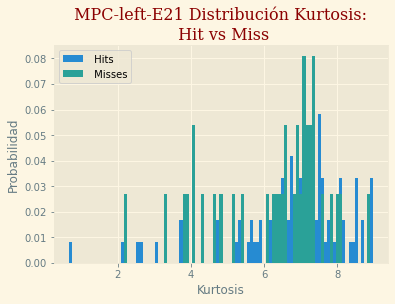

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en VPC-E22 es


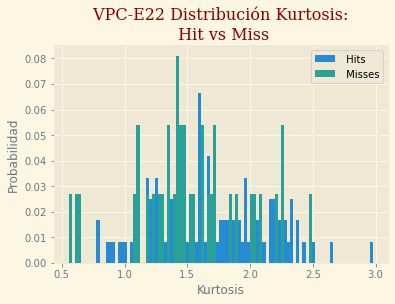

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en VPC-E24 es


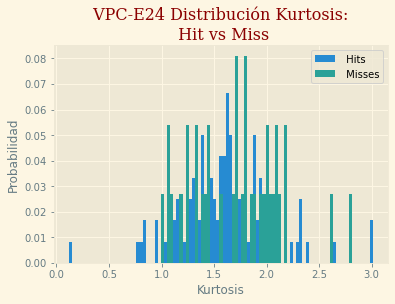

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en VPC-E28 es


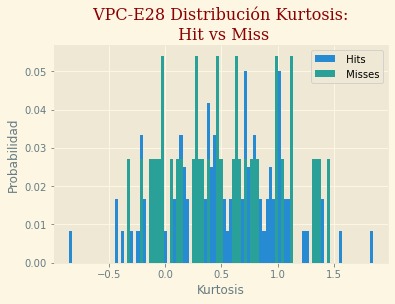

______________________________________________________________


In [19]:
##Distribution of kurtosis of misses and hits, of every electrode in this experiment without separation of conditions
#### in plots: comparing distribution of kurtosis in hits with distribution of kurtosis in misses
khits=dict()
kmiss=dict()
for e in e_keys:
    ehits=np.vstack(eltcshm[e][0])
    emiss=np.vstack(eltcshm[e][1])
    dhits,dmiss,bins=fn.getDistributions(ehits,emiss)
    k1=np.apply_along_axis(kurtosis,1,dhits) #kurtosis para cada ensayo
    k2=np.apply_along_axis(kurtosis,1,dmiss) #kurtosis para cada ensayo
    k1=k1.transpose()
    k2=k2.transpose()
    khits.update({e:k1})
    kmiss.update({e:k2})
    
    print('la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en '+str(e)+' es')
    dhits,dmiss,bins=fn.getDistributions2(k1,k2)
    plt.bar(bins[1:],dhits,width=np.diff(bins),color='C0',label=' Hits')# distribución del 1er ensayo hit de ese experimento 
    plt.bar(bins[1:],dmiss,width=np.diff(bins),color='C1',label=' Misses')# distribución del 1er ensayo miss de ese experimento 
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,} # formato para el título
    plt.title(f' {e} Distribución Kurtosis: \n Hit vs Miss',fontdict_title)
    plt.legend() 
    plt.xlabel('Kurtosis')
    plt.ylabel('Probabilidad')
    plt.show()    
    print('______________________________________________________________')

la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en S1-E1 es


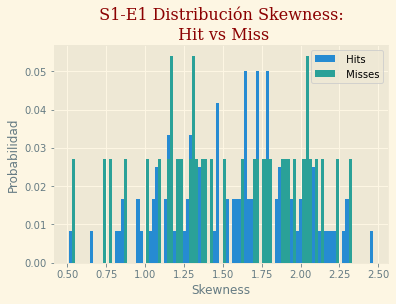

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en S1-E2 es


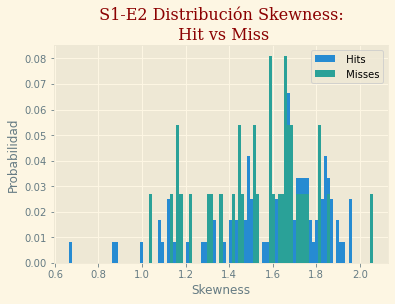

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en S1-E3 es


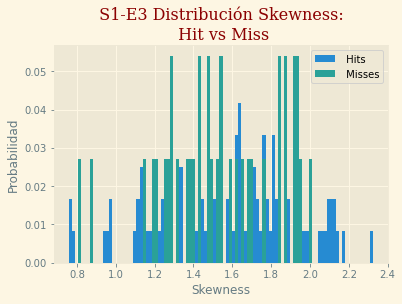

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en S1-E4 es


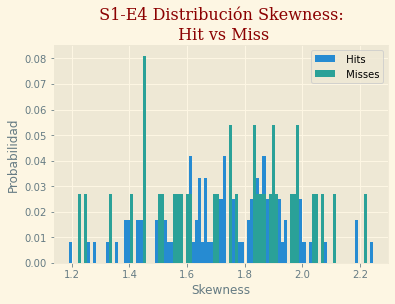

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en S1-E6 es


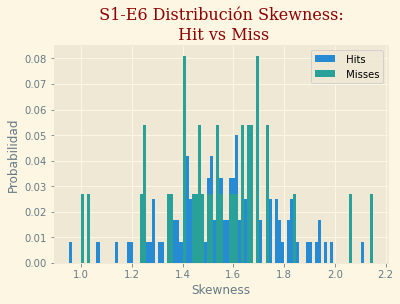

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en S2-E8 es


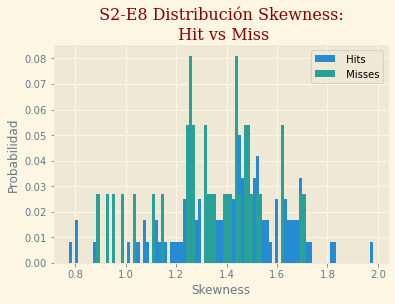

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en S2-E9 es


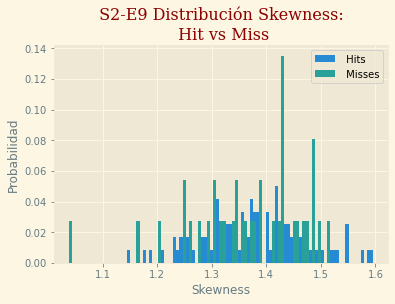

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en S2-E10 es


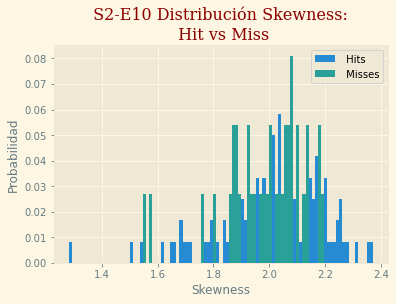

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en S2-E11 es


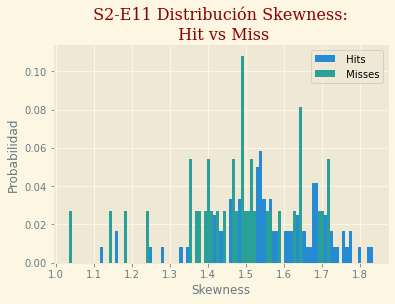

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en MPC-left-E17 es


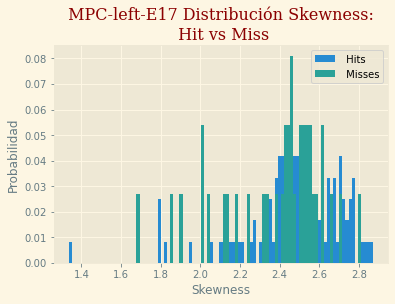

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en MPC-left-E19 es


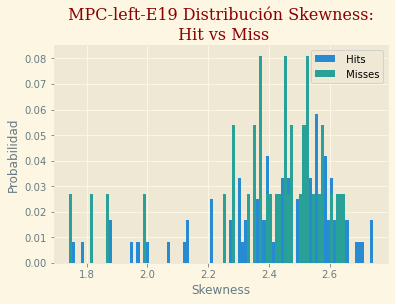

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en MPC-left-E20 es


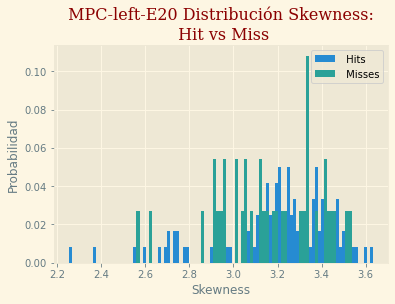

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en MPC-left-E21 es


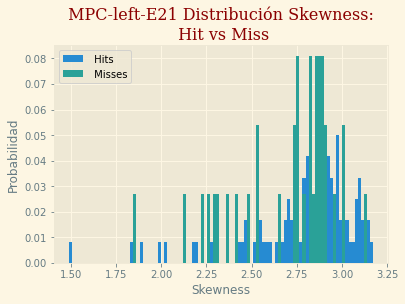

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en VPC-E22 es


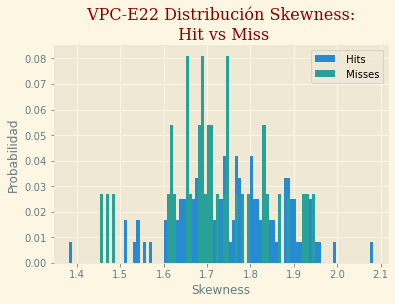

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en VPC-E24 es


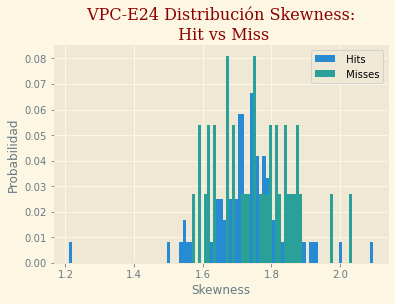

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en VPC-E28 es


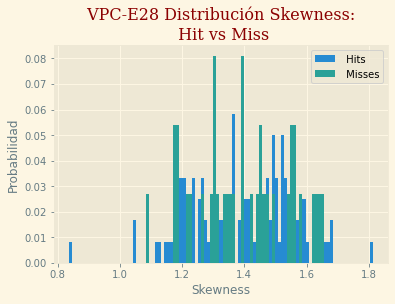

______________________________________________________________


In [21]:
##Distribution of skewness of misses and hits, of every electrode this experiment without separation of conditions
#### in plots: comparing distribution of skewness in hits with distribution of skewness in misses
skhits=dict()
skmiss=dict()
for e in e_keys:
    ehits=np.vstack(eltcshm[e][0])
    emiss=np.vstack(eltcshm[e][1])
    dhits,dmiss,bins=fn.getDistributions(ehits,emiss)
    sk1=np.apply_along_axis(skew,1,dhits)
    sk2=np.apply_along_axis(skew,1,dmiss)
    sk1=sk1.transpose()
    sk2=sk2.transpose()
    skhits.update({e:k1})
    skmiss.update({e:k2})
    
    print('la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en '+str(e)+' es')
    dhits,dmiss,bins=fn.getDistributions2(sk1,sk2)
    plt.bar(bins[1:],dhits,width=np.diff(bins),color='C0',label=' Hits')# distribución del 1er ensayo hit de ese experimento 
    plt.bar(bins[1:],dmiss,width=np.diff(bins),color='C1',label=' Misses')# distribución del 1er ensayo miss de ese experimento 
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,} # formato para el título
    plt.title(f' {e} Distribución Skewness: \n Hit vs Miss',fontdict_title)
    plt.legend() 
    plt.xlabel('Skewness')
    plt.ylabel('Probabilidad')
    plt.show()    
    print('______________________________________________________________')
    

la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en S1-E1 es


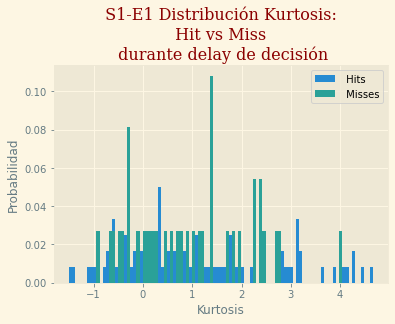

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en S1-E2 es


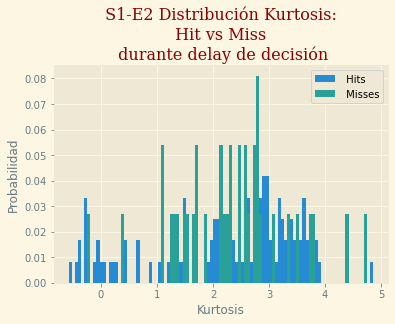

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en S1-E3 es


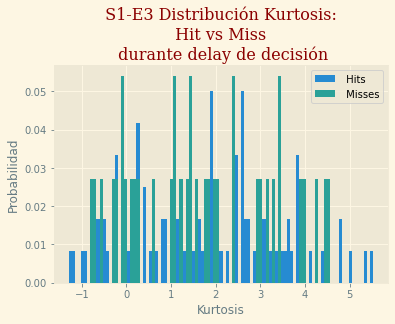

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en S1-E4 es


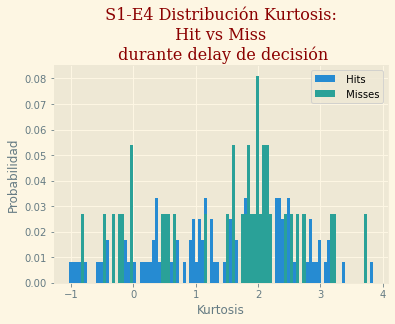

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en S1-E6 es


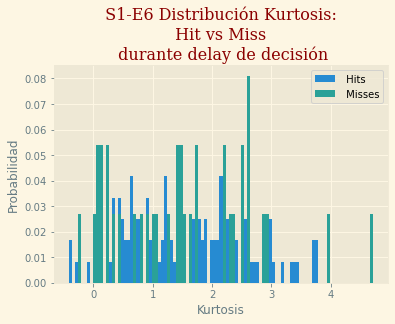

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en S2-E8 es


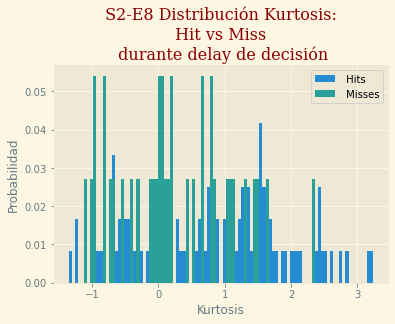

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en S2-E9 es


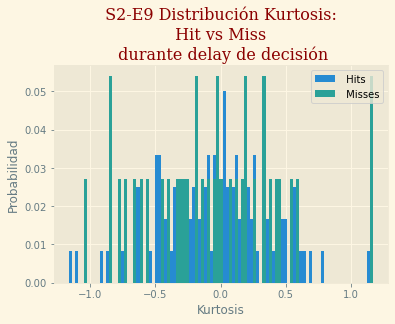

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en S2-E10 es


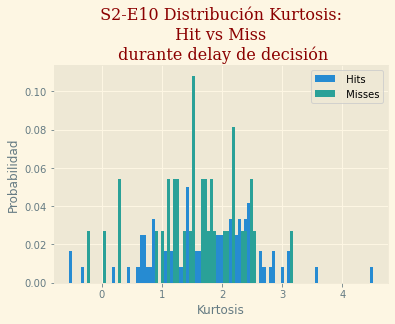

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en S2-E11 es


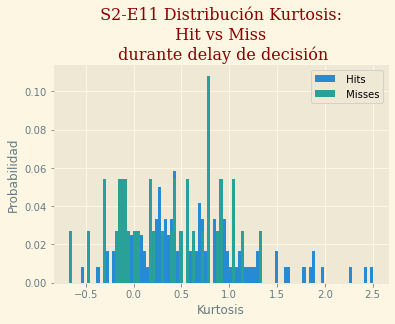

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en MPC-left-E17 es


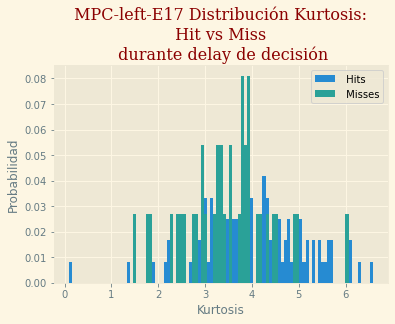

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en MPC-left-E19 es


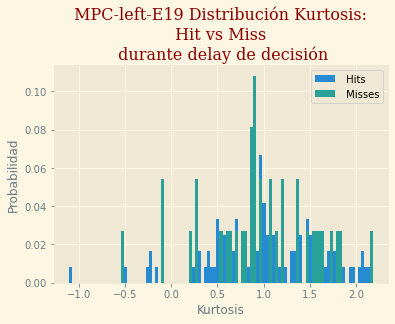

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en MPC-left-E20 es


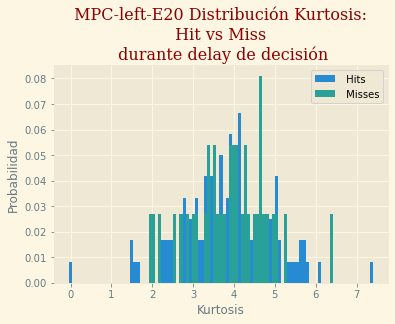

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en MPC-left-E21 es


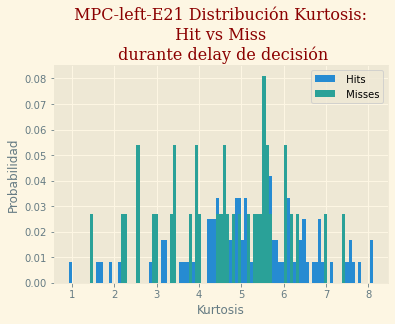

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en VPC-E22 es


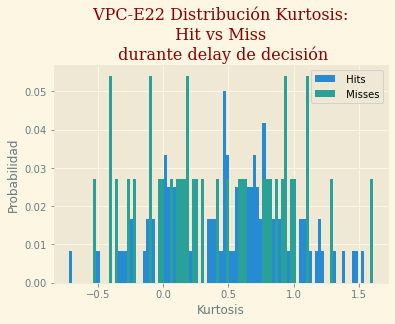

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en VPC-E24 es


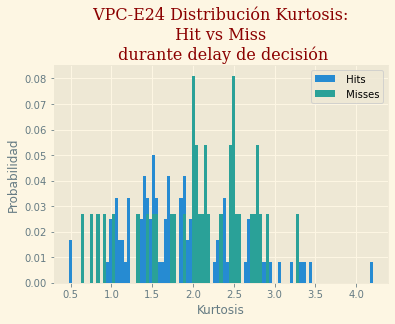

______________________________________________________________
la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en VPC-E28 es


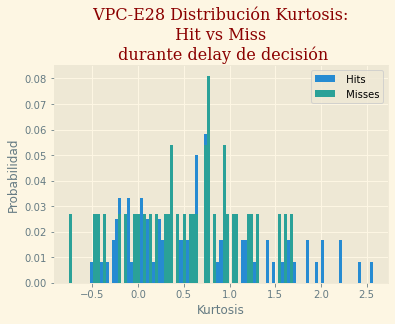

______________________________________________________________


In [22]:
# Only during the decision delay epoch
##Distribution of kurtosis of misses and hits, of every electrode in this experiment without separtion of condition
#### in plots: comparing distribution of kurtosis in hits with distribution of kurtosis in misses
khits=dict()
kmiss=dict()
for e in e_keys:
    ehits=np.vstack(eltcshm[e][0])[:,i_de]
    emiss=np.vstack(eltcshm[e][1])[:,i_de]
    dhits,dmiss,bins=fn.getDistributions(ehits,emiss)
    k1=np.apply_along_axis(kurtosis,1,dhits)
    k2=np.apply_along_axis(kurtosis,1,dmiss)
    k1=k1.transpose()
    k2=k2.transpose()
    khits.update({e:k1})
    kmiss.update({e:k2})
    
    print('la distribución de la kurtosis de las distribuciones de hits VS. la distribución  de la kurtosis de las distribuciones de misses en '+str(e)+' es')
    dhits,dmiss,bins=fn.getDistributions2(k1,k2)
    plt.bar(bins[1:],dhits,width=np.diff(bins),color='C0',label=' Hits')# distribución del 1er ensayo hit de ese experimento 
    plt.bar(bins[1:],dmiss,width=np.diff(bins),color='C1',label=' Misses')# distribución del 1er ensayo miss de ese experimento 
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,} # formato para el título
    plt.title(f' {e} Distribución Kurtosis: \n Hit vs Miss \n durante delay de decisión',fontdict_title)
    plt.legend() 
    plt.xlabel('Kurtosis')
    plt.ylabel('Probabilidad')
    plt.show()    
    print('______________________________________________________________')
    

la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en S1-E1 es


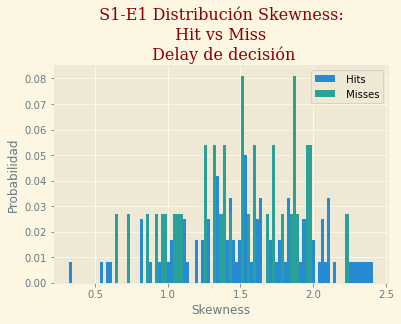

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en S1-E2 es


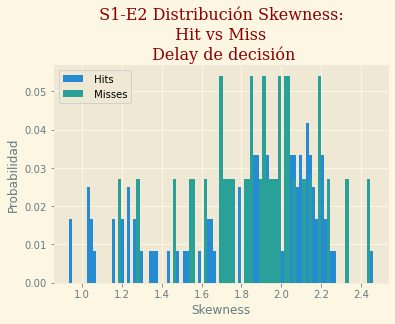

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en S1-E3 es


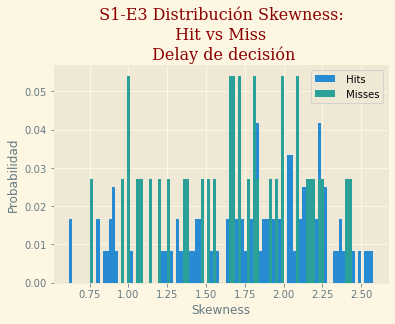

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en S1-E4 es


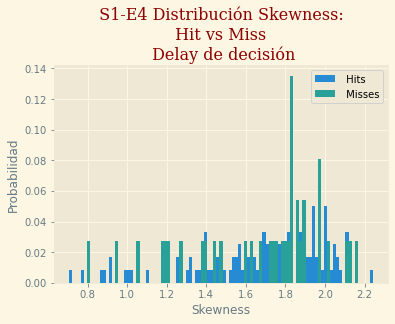

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en S1-E6 es


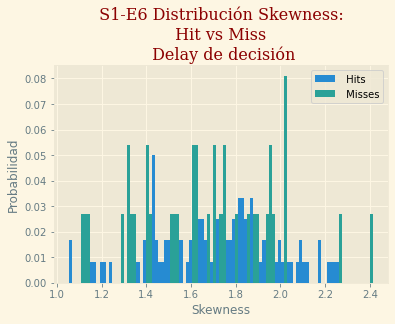

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en S2-E8 es


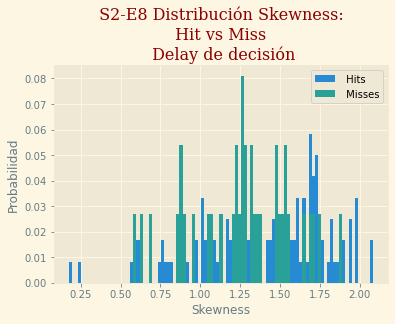

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en S2-E9 es


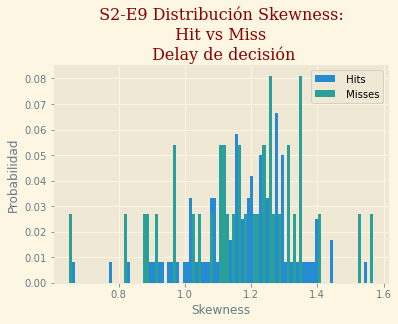

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en S2-E10 es


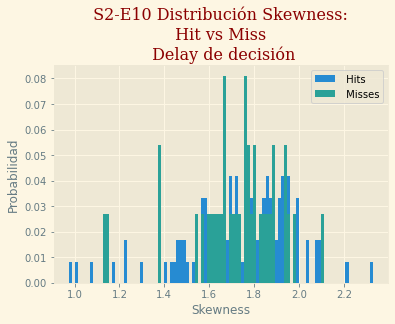

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en S2-E11 es


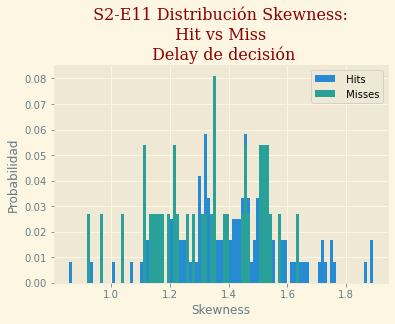

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en MPC-left-E17 es


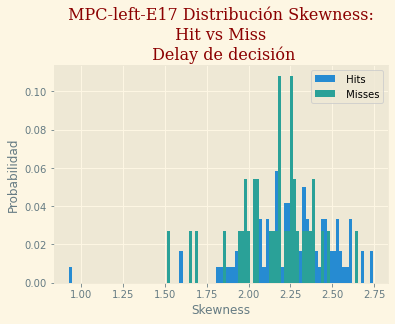

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en MPC-left-E19 es


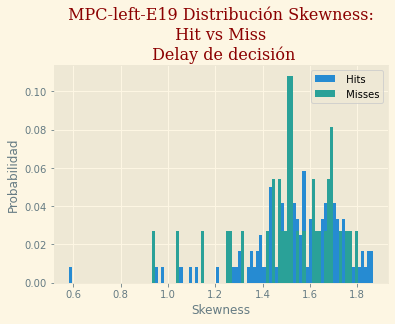

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en MPC-left-E20 es


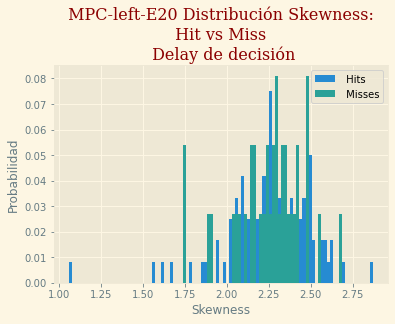

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en MPC-left-E21 es


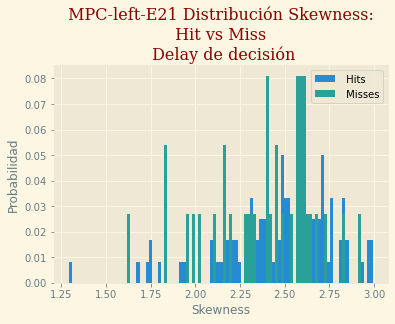

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en VPC-E22 es


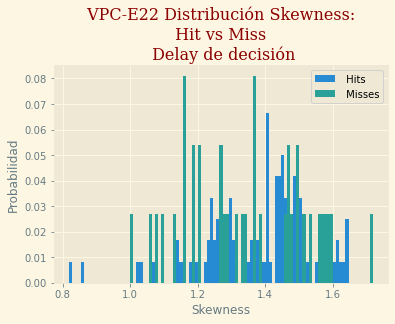

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en VPC-E24 es


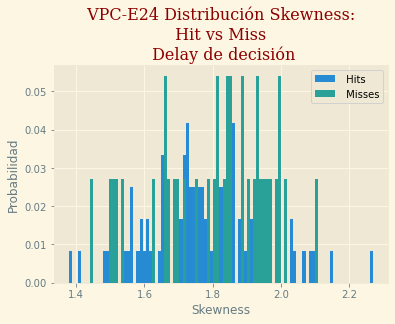

______________________________________________________________
la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en VPC-E28 es


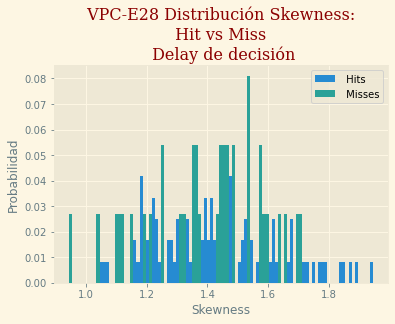

______________________________________________________________


In [24]:
# Only during decision delay epoch
##Distribution of skewness of misses and hits, of every electrode in this experiment without separtion of conditions
#### in plots: comparing distribution of skewness in hits with distribution of skewness in misses
skhits=dict()
skmiss=dict()
for e in e_keys:
    ehits=np.vstack(eltcshm[e][0])[:,i_de]
    emiss=np.vstack(eltcshm[e][1])[:,i_de]
    dhits,dmiss,bins=fn.getDistributions(ehits,emiss)
    sk1=np.apply_along_axis(skew,1,dhits)
    sk2=np.apply_along_axis(skew,1,dmiss)
    sk1=sk1.transpose()
    sk2=sk2.transpose()
    skhits.update({e:k1})
    skmiss.update({e:k2})
    
    print('la distribución de la skewness de las distribuciones de hits VS. la distribución de la skewness de las distribuciones de misses en '+str(e)+' es')
    dhits,dmiss,bins=fn.getDistributions2(sk1,sk2)
    plt.bar(bins[1:],dhits,width=np.diff(bins),color='C0',label=' Hits')# distribución del 1er ensayo hit de ese experimento 
    plt.bar(bins[1:],dmiss,width=np.diff(bins),color='C1',label=' Misses')# distribución del 1er ensayo miss de ese experimento 
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,} # formato para el título
    plt.title(f' {e} Distribución Skewness: \n Hit vs Miss \n Delay de decisión',fontdict_title)
    plt.legend() 
    plt.xlabel('Skewness')
    plt.ylabel('Probabilidad')
    plt.show()    
    print('______________________________________________________________')
    

C:\Users\sound\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\sound\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\sound\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

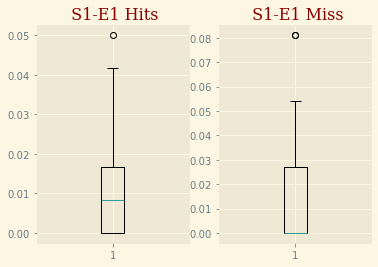

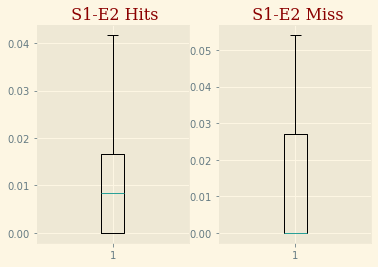

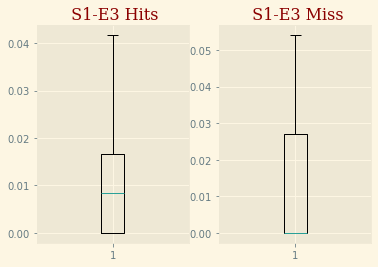

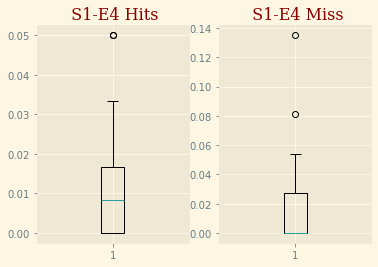

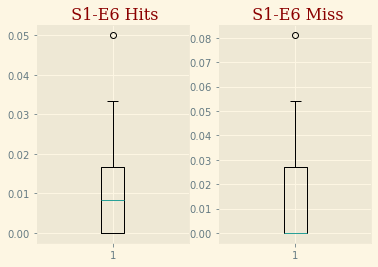

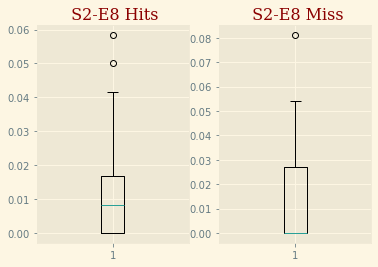

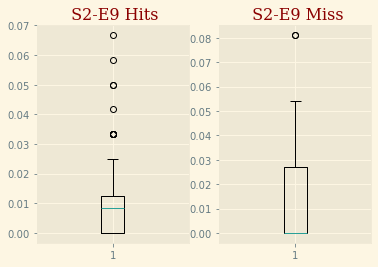

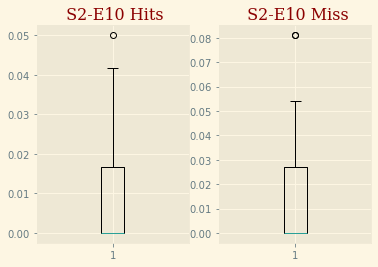

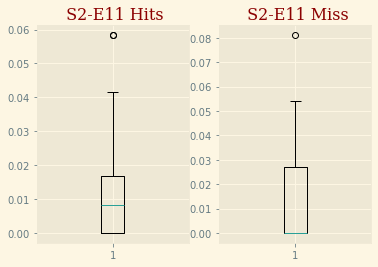

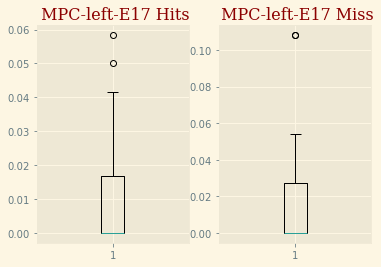

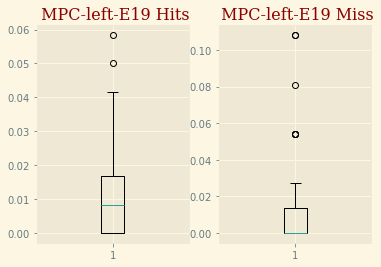

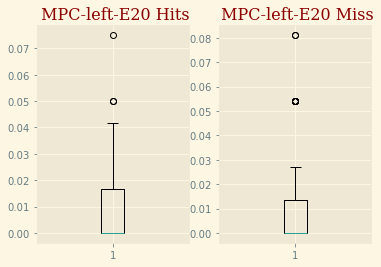

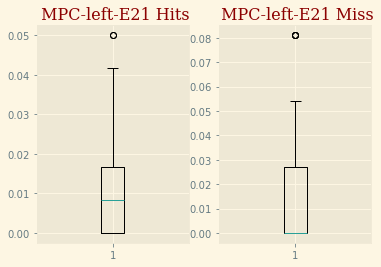

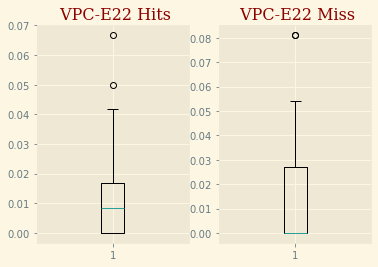

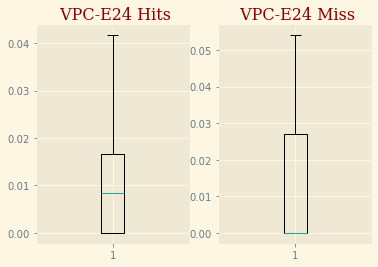

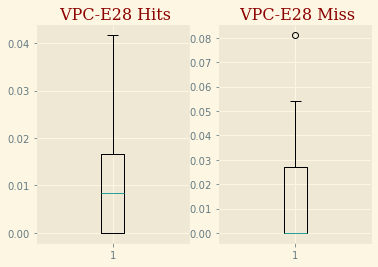

In [41]:
##Boxplots of misses and hits, of every electrode in this experiments without separtion of conditions
#### in plots: comparing first try of hits with first try of misses
for e in e_keys:
    ehits=np.vstack(eltcshm[e][0])[:,i_de]
    emiss=np.vstack(eltcshm[e][1])[:,i_de]
    dhits,dmiss,bins=fn.getDistributions(ehits,emiss)
    sk1=np.apply_along_axis(skew,1,dhits)
    sk2=np.apply_along_axis(skew,1,dmiss)
    sk1=sk1.transpose()
    sk2=sk2.transpose()
    skhits.update({e:k1})
    skmiss.update({e:k2})
    #boxplot(data, notch=None, vert=None, patch_artist=None, widths=None)
    dhits,dmiss,bins=fn.getDistributions2(sk1,sk2)
    #########
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.boxplot(dhits) # dhtis[0] corresponde a la distribución del ensayo 1
    ax1.set_title(f' {e} Hits',fontdict_title)
    #######################
    ax2.boxplot(dmiss) # dmiss[0] corresponde a la distribución del ensayo 1
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,} # formato para el título
    ax2.set_title(f' {e} Miss',fontdict_title)